**Constitute a Simple Moving Average crossover system for trend trading on the daily time frame**

In [68]:
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

start = datetime.datetime(2007, 6, 1)
end = datetime.datetime(2018, 1, 1)

tickers = ['AAPL']
data = data.DataReader(['AAPL'], 'yahoo', start, end)
data = data['Open']
data = data.sort_index(axis=0, ascending=True)
data.head()

,AAPL
Date,
2007-06-01,17.299999
2007-06-04,16.947144
2007-06-05,17.344286
2007-06-06,17.471428
2007-06-07,17.855715


In [69]:
data['SMA1'] = data.rolling(50).mean()
data.tail()

,AAPL,SMA1
Date,,
2017-12-22,174.679993,168.818199
2017-12-26,170.800003,169.099599
2017-12-27,170.100006,169.343599
2017-12-28,171.000000,169.567999
2017-12-29,170.520004,169.769999


In [70]:
data['SMA2'] = data['AAPL'].rolling(200).mean()
data.tail()

,AAPL,SMA1,SMA2
Date,,,
2017-12-22,174.679993,168.818199,155.26940
2017-12-26,170.800003,169.099599,155.42915
2017-12-27,170.100006,169.343599,155.58315
2017-12-28,171.000000,169.567999,155.74110
2017-12-29,170.520004,169.769999,155.89010


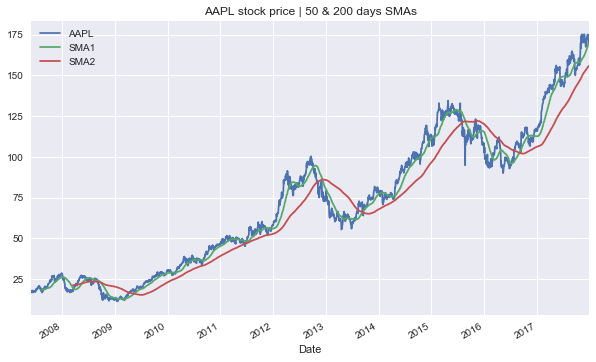

In [71]:
data.plot(title='AAPL stock price | 50 & 200 days SMAs', figsize=(10, 6))

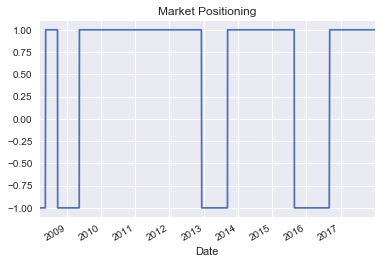

In [72]:
import numpy as np
data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
data.dropna(inplace=True)
data['position'].plot(ylim=[-1.1, 1.1], title='Market Positioning')

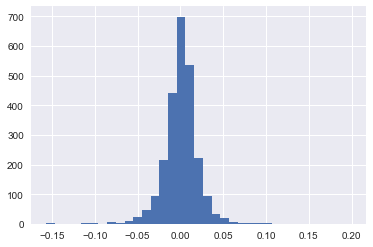

In [73]:
data['returns'] = np.log(data['AAPL'] / data['AAPL'].shift(1))
data['returns'].hist(bins=35)

In [74]:
data['strategy'] = data['position'].shift(1) * data['returns']
data[['returns', 'strategy']].sum()

returns     2.276244
strategy    1.755850
dtype: float64

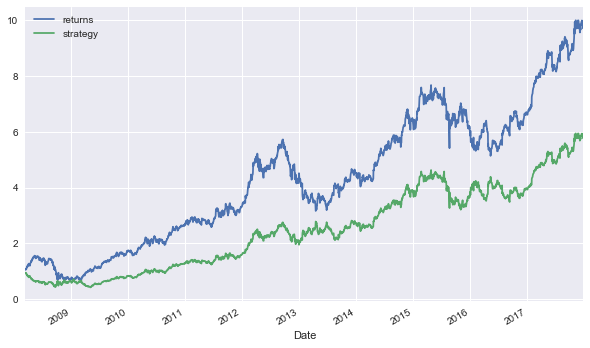

In [75]:
data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))

**annualized mean return**

**annualized standard deviation**

In [76]:
data[['returns', 'strategy']].mean() * 252

returns     0.232609
strategy    0.179430
dtype: float64

In [77]:
data[['returns', 'strategy']].std() * 252 ** 0.5

returns     0.331725
strategy    0.331856
dtype: float64

In [78]:
data.head()

,AAPL,SMA1,SMA2,position,returns,strategy
Date,,,,,,
2008-03-17,17.507143,19.691257,21.325536,-1,NaN,NaN
2008-03-18,18.454287,19.513343,21.331307,-1,0.052688,-0.052688
2008-03-19,19.017143,19.375829,21.341657,-1,0.030044,-0.030044
2008-03-20,18.731428,19.235771,21.348593,-1,-0.015138,0.015138
2008-03-24,19.144285,19.129229,21.356957,-1,0.021801,-0.021801


In [79]:
data['cumreturns']=1+(data['strategy'].cumsum())
data.head()

,AAPL,SMA1,SMA2,position,returns,strategy,cumreturns
Date,,,,,,,
2008-03-17,17.507143,19.691257,21.325536,-1,NaN,NaN,NaN
2008-03-18,18.454287,19.513343,21.331307,-1,0.052688,-0.052688,0.947312
2008-03-19,19.017143,19.375829,21.341657,-1,0.030044,-0.030044,0.917268
2008-03-20,18.731428,19.235771,21.348593,-1,-0.015138,0.015138,0.932406
2008-03-24,19.144285,19.129229,21.356957,-1,0.021801,-0.021801,0.910605


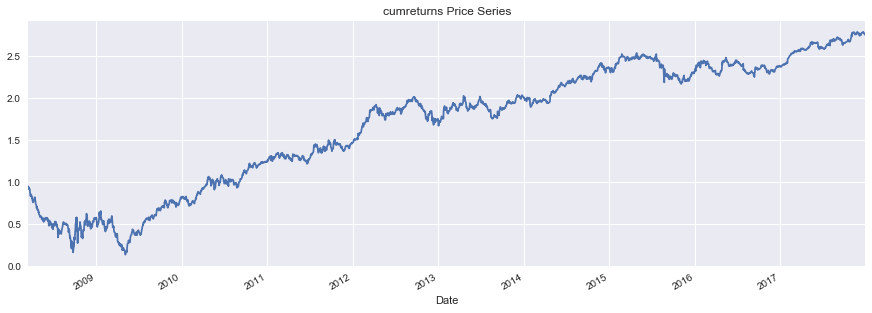

In [80]:
import ffn
#%pylab inline
df_portfolio_value = data['cumreturns']
perf = df_portfolio_value.calc_stats()
perf.plot()

In [81]:
print perf.display()

Stats for cumreturns from 2008-03-17 00:00:00 - 2017-12-29 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
-                   0.47  -       -85.55%

Annualized Returns:
mtd    3m     6m     ytd     1y      3y     5y     10y    incep.
-----  -----  -----  ------  ------  -----  -----  -----  --------
0.02%  4.04%  6.33%  15.98%  16.06%  5.21%  9.52%  -      -

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  0.47     0.48       1.19
mean    26.39%   21.66%     20.01%
vol     56.46%   45.48%     16.89%
skew    2.30     2.24       0.80
kurt    45.24    20.23      0.25
best    42.16%   91.21%     50.66%
worst   -34.34%  -48.39%    -2.18%

Drawdowns:
max      avg       # days
-------  ------  --------
-85.55%  -3.47%      38.3

Misc:
---------------  ------
avg. up month    6.86%
avg. down month  -6.58%
up year %        88.89%
12m up %         8

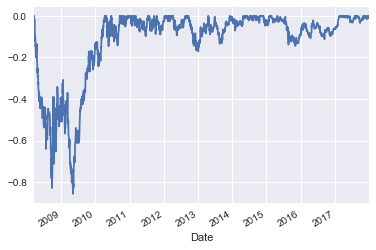

In [82]:
ax = perf.prices.to_drawdown_series().plot()

In [87]:
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

start = datetime.datetime(2007, 6, 1)
end = datetime.datetime(2018, 1, 1)

tickers = ['AAPL']
data = data.DataReader(['AAPL'], 'yahoo', start, end)
data = data['Open']
data = data.sort_index(axis=0, ascending=True)
data.head()

,AAPL
Date,
2007-06-01,17.299999
2007-06-04,16.947144
2007-06-05,17.344286
2007-06-06,17.471428
2007-06-07,17.855715


In [91]:
def RSI(series, period):
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
    u = u.drop(u.index[:(period-1)])
    d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
    d = d.drop(d.index[:(period-1)])
    rs = pd.stats.moments.ewma(u, com=period-1, adjust=False) / \
         pd.stats.moments.ewma(d, com=period-1, adjust=False)
    return 100 - 100 / (1 + rs)
    
data['RSI'] = RSI(data['AAPL'], 14)
data.tail()

C:\Users\Aether Analytics\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:11: FutureWarning:

pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=False,com=13).mean()



,AAPL,RSI
Date,,
2017-12-22,174.679993,59.772754
2017-12-26,170.800003,47.575380
2017-12-27,170.100006,45.761079
2017-12-28,171.000000,48.481395
2017-12-29,170.520004,47.123918


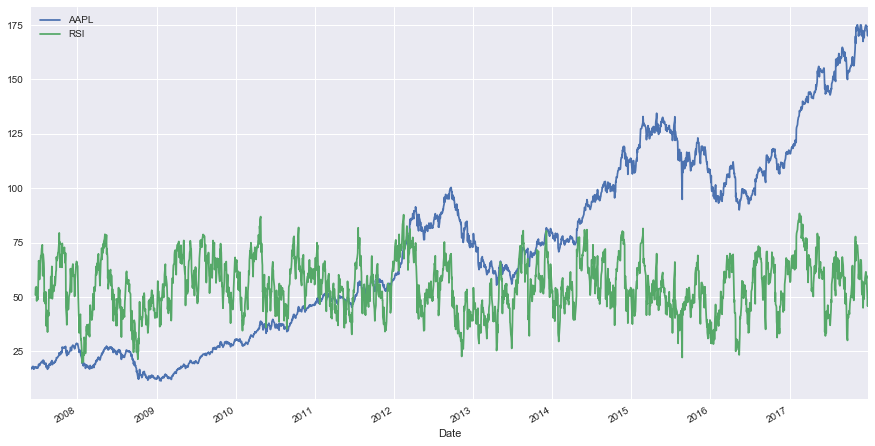

In [93]:
# Let's see a historical view of the closing price
data.plot(legend=True,figsize=(15,8))

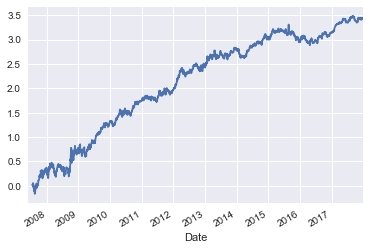

In [98]:
#Create an "empty" column as placeholder for our /position signals
data['Position'] = None
 
#Fill our newly created position column - set to sell (-1) when the price hits the upper band, and set to buy (1) when it hits the lower band
for row in range(len(data)):
 
    if (data['RSI'].iloc[row] > 69) and (data['RSI'].iloc[row-1] < 69):
        data['Position'].iloc[row] = 1
 
    if (data['RSI'].iloc[row] < 30) and (data['RSI'].iloc[row-1] > 30):
        data['Position'].iloc[row] = -1  
 
#Forward fill our position column to replace the "None" values with the correct long/short positions to represent the "holding" of our position
#forward through time
data['Position'].fillna(method='ffill',inplace=True)
 
#Calculate the daily market return and multiply that by the position to determine strategy returns
data['Market Return'] = np.log(data['AAPL'] / data['AAPL'].shift(1))
data['Strategy Return'] = data['Market Return'] * data['Position']
 
#Plot the strategy returns
data['Strategy Return'].cumsum().plot()

In [104]:
df2_portfolio_value =  data['Strategy Return'].cumsum()
perf2 = df2_portfolio_value.calc_stats()
print perf2.display()

Stats for Strategy Return from 2007-06-01 00:00:00 - 2017-12-29 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
-                   0.09  -       -395.62%

Annualized Returns:
mtd    3m     6m     ytd    1y     3y     5y     10y     incep.
-----  -----  -----  -----  -----  -----  -----  ------  --------
0.02%  0.86%  1.92%  8.90%  8.96%  3.76%  6.45%  25.03%  -

Periodic:
        daily     monthly    yearly
------  --------  ---------  --------
sharpe  0.09      0.43       0.81
mean    42.29%    137.38%    28.66%
vol     474.77%   322.34%    35.49%
skew    -8.07     10.42      1.72
kurt    596.12    112.93     2.47
best    663.95%   1017.97%   110.27%
worst   -991.58%  -72.46%    -3.58%

Drawdowns:
max       avg       # days
--------  ------  --------
-395.62%  -8.79%     26.58

Misc:
---------------  ------
avg. up month    20.08%
avg. down month  -5.62%
up year %        90.00%
1

C:\Users\Aether Analytics\AppData\Local\Enthought\Canopy\User\lib\site-packages\ffn\core.py:981: RuntimeWarning:

invalid value encountered in log



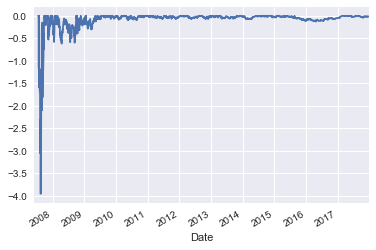

In [105]:
ax = perf2.prices.to_drawdown_series().plot()